# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: ______
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

Text(0.5, 1.0, 'Grafica')

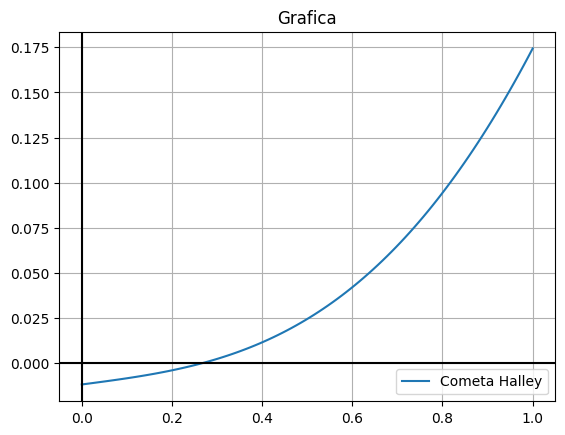

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

e = 0.9672671
T = 75.96000
t_0 = 1986.1113 #(febrero 9 de 1986
fM = lambda T,t_0,t: (np.pi*2 / T) * (t - t_0) #una funcion lambda para el valor de m en funcion del tiempo
t = 1986 + (91 * 0.1113 / 40) #(1 de abril de 1986)
M = fM(T,t_0,t)
E = np.linspace(0,1, 100) # un intervalo de el cual ya es dado
def anomalia_excentrica (E, e, M):
    """La siguiente funcion recibe tre variable las cuales son
    E = un intervalo de anomalia exentrica
    e = la cual es la excentricidad respecto a los semiejes
    M = la anomalia media en funcion del tiempo
    esta funcion recorre los valores de del linspace de E para retornar los valores de de la funcion en cada uno de estos"""
    valores = []
    for i in E:
        fE = i - e*np.sin(i) - M
        valores.append(fE)
    return valores
fE = anomalia_excentrica(E, e, M)
plt.plot(E,fE, label = "Cometa Halley")
plt.grid()
plt.legend()
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.title("Grafica")

In [2]:
def funcion_E_de_tiempo(T, t_0):
    valores = []
    I = np.linspace(0,1, 100)
    t_i = lambda i: t_0 + i*delta_t
    fM2 = lambda T,t_i: (np.pi*2 / T) * (t_i - t_0)
    delta_t = T/100
    for i in range(len(I)):
        t_I = t_i(i)
        M2 = fM2(T, t_I)
        E_t = lambda E: E - e*np.sin(E) - M2
        valores.append(E_t)
    newton = optimize.newton(E_t, 0.2)
    return valores, newton

E_t = funcion_E_de_tiempo(T,t_0)

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar

# --------------------------
# Parte 1: Para T = 0.5

T_val = 0.5

# Definimos la función f(m) = tanh(m/T) - m (ya con T fijo)
def f_secante(m):
    return np.tanh(m / 0.5) - m

def df_newton(m):
    return (1 / 0.5) * (1 - np.tanh(m / 0.5)**2) - 1

def g_punto_fijo(m):
    return np.tanh(m / 0.5)

# Método de la secante
sol_secante = root_scalar(f_secante, method='secant', x0=0.1, x1=0.9)
print(f"Secante: m = {sol_secante.root:.4f}")

# Método de Newton-Raphson
sol_newton = newton(f_secante, x0=0.5, fprime=df_newton)
print(f"Newton-Raphson: m = {sol_newton:.4f}")

# Método de punto fijo
m_actual = 0.5
for _ in range(100):
    m_siguiente = g_punto_fijo(m_actual)
    if abs(m_siguiente - m_actual) < 1e-6:
        break
    m_actual = m_siguiente
print(f"Punto fijo: m = {m_actual:.4f}")

# --------------------------
# Parte 2: Gráfica usando método de la secante

T_values = np.linspace(0.1, 0.99, 100)
m_values = []

for T in T_values:
    # Definimos la función f(m) para este T (usando lambda para que T quede fijo)
    f_T = lambda m: np.tanh(m / T) - m
    try:
        sol = root_scalar(f_T, method='secant', x0=0.01, x1=0.9)
        m_values.append(sol.root)
    except:
        m_values.append(np.nan)  # En caso de error numérico

plt.plot(T_values, m_values, label='Magnetización reducida m(T)')
plt.xlabel("Temperatura reducida T")
plt.ylabel("Magnetización reducida m")
plt.title("m(T) usando método de la secante")
plt.grid(True)
plt.legend()
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



In [ ]:
from scipy.optimize import fsolve

R = 8.314
T0 = 4.444
G = -1e5
def gibbs_ecuacion(T):
    return -R * T * (5/2) * np.log(T / T0) - G
T_aproximada = 200
T = fsolve(gibbs_ecuacion, T_aproximada)[0]
print(f"La temperatura T que satisface G = -10^5 J es aproximadamente {T:.2f} K")

# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

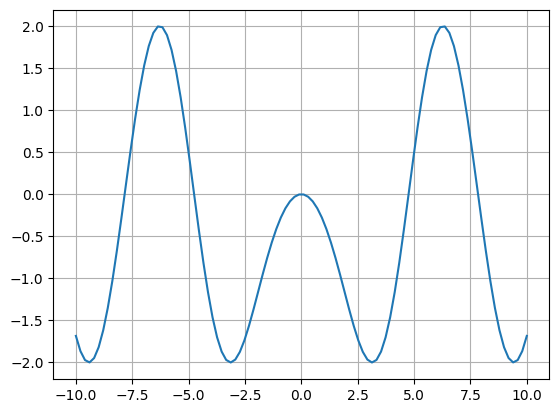

In [4]:
#Graficar l(x) y l_prime(x) en el intervalo de x en [-10,10]
def intensidad(x):
  l_0 = 1
  return l_0 * np.where(x == 0, 1, (np.sin(x) / x)**2)
def intensidad_prime(x):
  l_0 = 1
  return np.where(x == 0, 0, (2*l_0)*(np.cos(x) - (np.sin(x)/x)*(np.sin(x)/x)))

x = np.linspace(-10, 10, 100)
f = intensidad(x)
f_prime = intensidad_prime(x)
plt.plot(x, f_prime)
plt.grid()

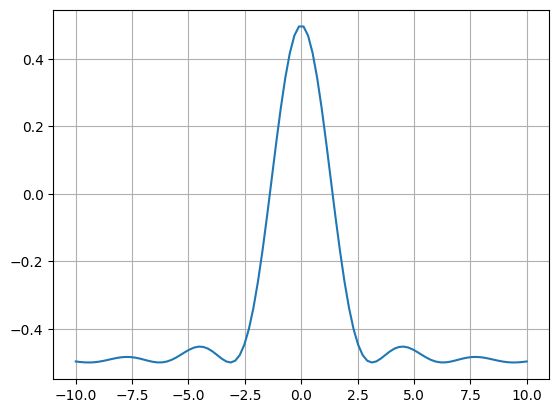

In [5]:
#Segunda parte
from scipy.optimize import newton
def funcion_objetivo(x):
    l_0 = 1
    return intensidad(x) - l_0/2
g = funcion_objetivo(x)
plt.plot(x, g)
plt.grid()
#La función no tiene un cero en x = pi, lo tiene antes en (-2.5, 2.5)

In [6]:
# Función objetivo para raíz: I(x) - I0/2


# Método de la secante para hallar la x entre -2.5 y 0
x0 = -2.5     # primer aproximación
x1 = 0   # segunda aproximación

x_half = newton(funcion_objetivo, x0, x1=x1)
print(f'El valor positivo x1/2 donde I(x) = I0/2 es aproximadamente: {x_half}')

El valor positivo x1/2 donde I(x) = I0/2 es aproximadamente: -1.3915573782515103


/tmp/ipykernel_60/492307061.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return l_0 * np.where(x == 0, 1, (np.sin(x) / x)**2)


In [7]:
#Hallemos el primer máximos local
x_0_1 = -7.5
x_1_1 = -5
max_local_1 = newton(intensidad_prime, x_0_1, x1 = x_1_1)
print(f'El primer máximo local se halla en x = {max_local_1}')
#Segundo máximo local
x_0_2 = -2.5
x_1_2 = 1
max_local_2 = newton(intensidad_prime, x_0_2, x1 = x_1_2)
print(f'El segundo máximo local se halla en x = {max_local_2}')
#Tercer máximo local
x_0_3 = 5
x_1_3 = 7.5
max_local_3 = newton(intensidad_prime, x_0_3, x1 = x_1_3)
print(f'El tercer máximo local se halla en x = {max_local_3}')

El primer máximo local se halla en x = -4.756517243187497
El segundo máximo local se halla en x = -2.138056138627048e-08
El tercer máximo local se halla en x = 4.756517243187497


In [8]:
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        fa = f(a)
        fb = f(b)
        c = b - fb * (b - a) / (fb - fa)
        fc = f(c)

        if abs(fc) < tol:
            return c

        if fa * fc < 0:
            b = c
        else:
            a = c

    raise ValueError("No se encontró raíz en el número máximo de iteraciones")

# Ejemplo para encontrar una raíz positiva de la derivada
a = -9
b = -7

if intensidad_prime(a) * intensidad_prime(b) > 0:
    raise ValueError("f(a) y f(b) no tienen signos opuestos. No se garantiza que haya una raíz en [a, b].")

x_raiz = regula_falsi(intensidad_prime, a, b)
print(f'\nLa raíz de intensidad_prime(x) en [{a}, {b}] es aproximadamente: {x_raiz:.6f}')


La raíz de intensidad_prime(x) en [-9, -7] es aproximadamente: -7.837706


# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

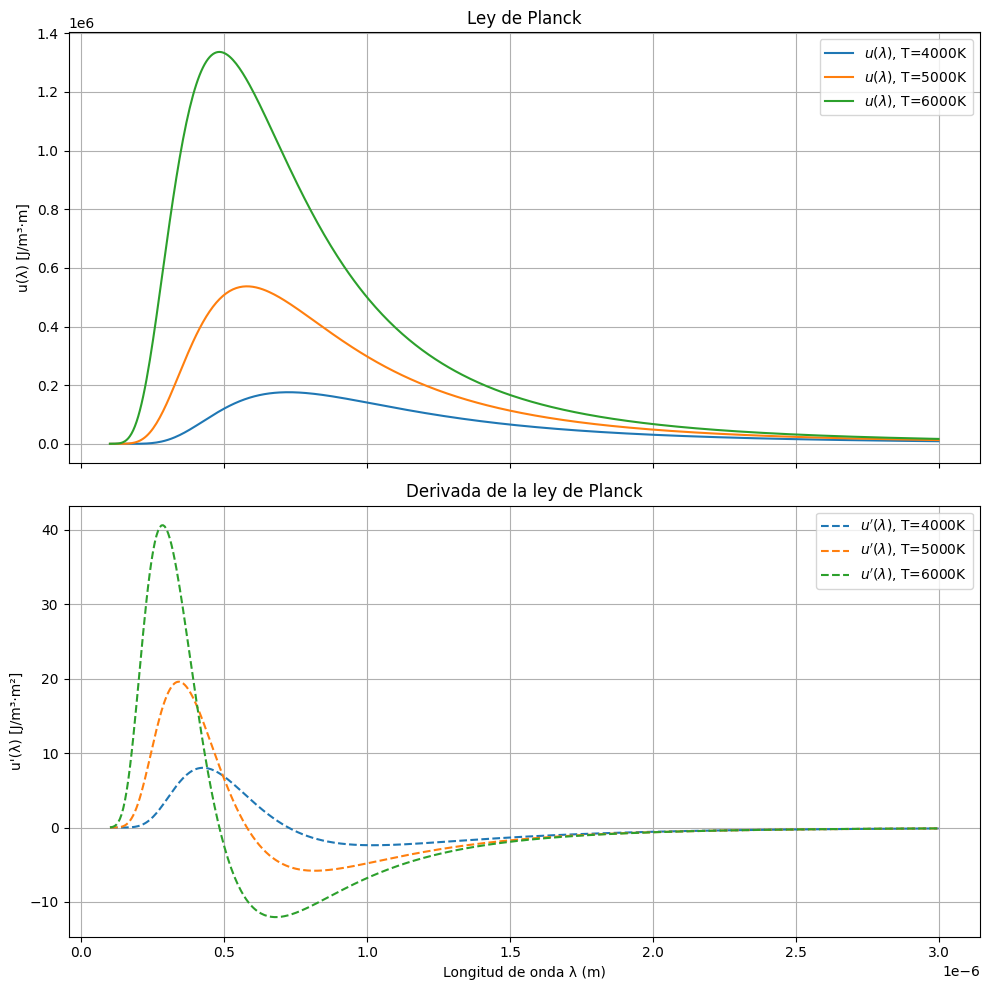

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
h = 6.626 * 10**-34  # J·s
k_B = 1.381 * 10**-23  # J/K
c = 2.998 * 10**8  # m/s

# Función de la ley de Planck
def ley_de_Planck(K, x, landa_0):
    return K * (1 / (x**5) * (np.exp(1/x) - 1)**-1)

# Derivada de la ley de Planck
def derivada_ley_de_Planck(K, x, landa_0):
    # expresión corregida de la derivada
    return K * landa_0 * (((5 * x) + (1 - 5 * x) * np.exp(1/x)) / ((x**7) * (np.exp(1/x) - 1)**2))

# Valores de temperatura y longitud de onda
T_values = [4000, 5000, 6000]
landa_values = np.linspace(1e-7, 3e-6, 500)

# Crear figura y subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Graficar u(λ) y u'(λ) por separado
for T in T_values:
    landa_0 = (h * c) / (k_B * T)
    x = landa_values / landa_0
    K = (8 * np.pi * k_B * T) / (landa_0**4)

    u = ley_de_Planck(K, x, landa_0)
    du = derivada_ley_de_Planck(K, x, landa_0)

    ax1.plot(landa_values, u, label=f"$u(\lambda)$, T={T}K")
    ax2.plot(landa_values, du, '--', label=f"$u'(\lambda)$, T={T}K")

# Ajustes de la primera gráfica
ax1.set_ylabel("u(λ) [J/m³·m]")
ax1.set_title("Ley de Planck")
ax1.grid(True)
ax1.legend()

# Ajustes de la segunda gráfica
ax2.set_xlabel("Longitud de onda λ (m)")
ax2.set_ylabel("u'(λ) [J/m³·m²]")
ax2.set_title("Derivada de la ley de Planck")
ax2.grid(True)
ax2.legend()
plt.tight_layout()
plt.show()

In [10]:
from scipy.optimize import bisect, newton
import numpy as np
import matplotlib.pyplot as plt

# Constantes
h = 6.626e-34
k_B = 1.381e-23
c = 2.998e8

# Temperatura
T = 5778  # Kelvin

# Definir u(λ) directamente
def u_lambda(landa):
    a = 2.0 * h * c**2
    b = h * c / (landa * k_B * T)
    return a / (landa**5 * (np.exp(b) - 1))

# Derivada numérica de u(λ)
def derivada_u_lambda(landa, delta=1e-11):
    return (u_lambda(landa + delta) - u_lambda(landa - delta)) / (2 * delta)

# Encontrar λ_max
landa_max = bisect(derivada_u_lambda, 1e-7, 3e-6)
landa_max_2 = newton(derivada_u_lambda, x0 = 1e-7)
print(f"λ_max por bisección = {landa_max:.4e} m")
print(f"λ_max por newton = {landa_max_2:.4e} m")

λ_max por bisección = 5.0140e-07 m
λ_max por newton = 1.0010e-04 m


In [11]:
# Validar Ley de Wien
producto = landa_max * T
wien = 2.898e-3  # m·K
error_relativo = abs(producto - wien) / wien * 100
print(f"λ_max · T = {producto:.4e} m·K")
print(f"Error relativo: {error_relativo:.4f}%")

λ_max · T = 2.8971e-03 m·K
Error relativo: 0.0319%


# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

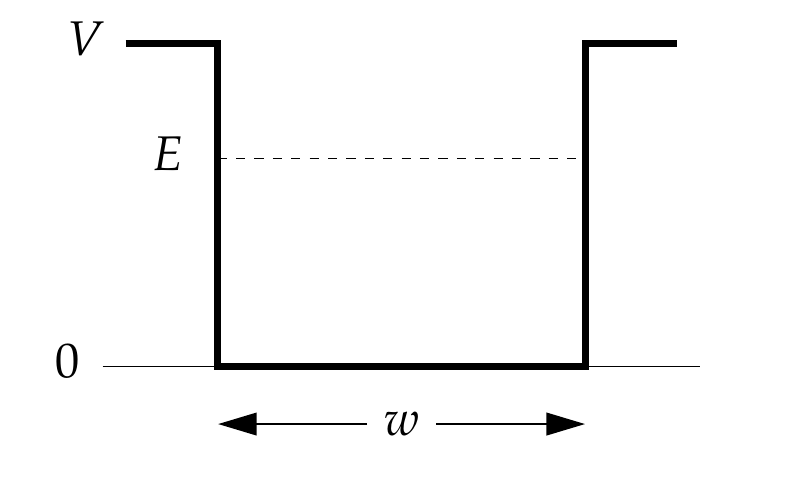

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} = 
\begin{cases} 
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

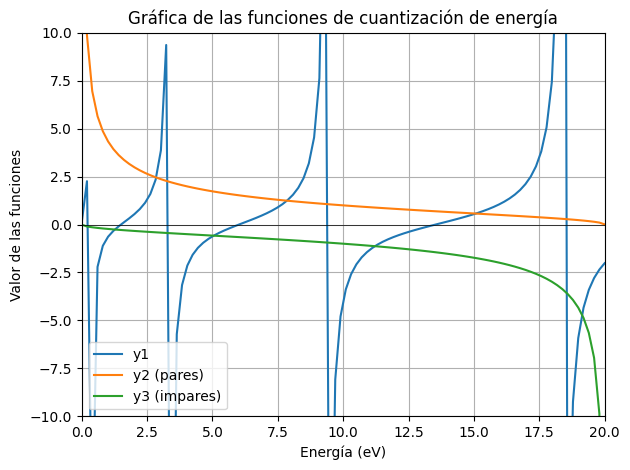

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
hbar = 1.0545718e-34  # Js
m = 9.11e-31  # kg
eV = 1.60218e-19  # J
V0 = 20 * eV  # J
w = 1e-9  # m

# Energía en el rango de 0 a V0 (en J)
E_vals = np.linspace(1e-3 * eV, V0 - 1e-3 * eV, 100)  # evitar división por cero

# Definiciones de las funciones
def y1(E):
    k = np.sqrt(w**2 * m * E / (2 * hbar**2))
    return np.tan(k)

def y2(E):
    return np.sqrt((V0 - E) / E)

def y3(E):
    return -np.sqrt(E / (V0 - E))

# Calcular los valores de las funciones
y1_vals = y1(E_vals)
y2_vals = y2(E_vals)
y3_vals = y3(E_vals)

# Convertir energía a eV para el eje x
E_eV = E_vals / eV

plt.plot(E_eV, y1_vals, label='y1')
plt.plot(E_eV, y2_vals, label=r'y2 (pares)')
plt.plot(E_eV, y3_vals, label=r'y3 (impares)')
plt.ylim(-10, 10)
plt.xlim(0, 20)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Energía (eV)')
plt.ylabel('Valor de las funciones')
plt.title('Gráfica de las funciones de cuantización de energía')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

In [12]:
import numpy as np
from scipy.optimize import newton

G = 6.674e-11       # m^3 kg^-1 s^-2
M = 5.974e24        # kg
m = 7.348e22        # kg
R = 3.844e8         # m
omega = 2.662e-6    # s^-1

# Definición de la función f(r)
def f(r):
    return G*M/r**2 - G*m/(R - r)**2 - omega**2 * r

# Derivada de f(r) con respecto a r
def df(r):
    term1 = -2 * G * M / r**3
    term2 = -2 * G * m / (R - r)**3
    term3 = -omega**2
    return term1 + term2 + term3


r0 = R * 0.4  # 40% del camino Tierra-Luna

# Aplicar el método de Newton
r_L1 = newton(f, r0, fprime=df, tol=1e-6)

print(f"Distancia desde la Tierra hasta el punto L1: {r_L1:.2f} m")

Distancia desde la Tierra hasta el punto L1: 326045071.67 m
